In [1]:
from sklearn import  metrics, tree 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
input_data = pd.read_csv(r'/Users/mac/Desktop/MLT/MLT-03 - Supervised learning algorithms overview/bioresponse.csv', sep = ',')

In [6]:
input_data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Train_data, Test_data, Train_labels, Test_labels = train_test_split(input_data.drop(['Activity'], axis=1),input_data.Activity,test_size = 0.2,random_state = 22)

In [13]:
DecisionTree_depth_2 = tree.DecisionTreeClassifier(random_state=1, max_depth = 2)
DecisionTree_depth_2.fit(Train_data, Train_labels)
prediction = DecisionTree_depth_2.predict(Test_data)

In [14]:
print('accuracy = ', metrics.accuracy_score(Test_labels, prediction))
print('precision = ', metrics.precision_score(Test_labels, prediction))
print('recall = ', metrics.recall_score(Test_labels, prediction))
print('roc_auc = ', metrics.roc_auc_score(Test_labels, prediction))
print('f1_score = ', metrics.f1_score(Test_labels, prediction))
print('log_loss = ', metrics.log_loss(Test_labels, prediction))

accuracy =  0.7403462050599201
precision =  0.6941964285714286
recall =  0.8428184281842819
roc_auc =  0.7420898423643922
f1_score =  0.7613219094247247
log_loss =  8.96827022883558


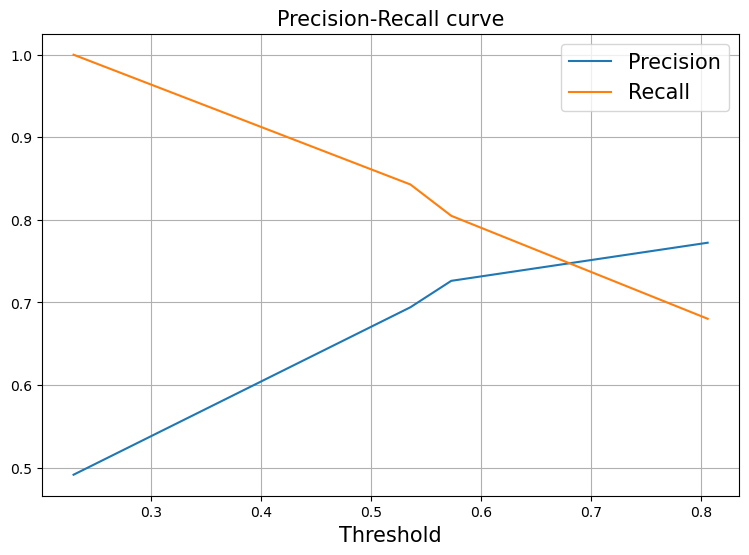

In [15]:
prediction_proba = DecisionTree_depth_2.predict_proba(Test_data)
prec, rec, thresh = metrics.precision_recall_curve(Test_labels, prediction_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

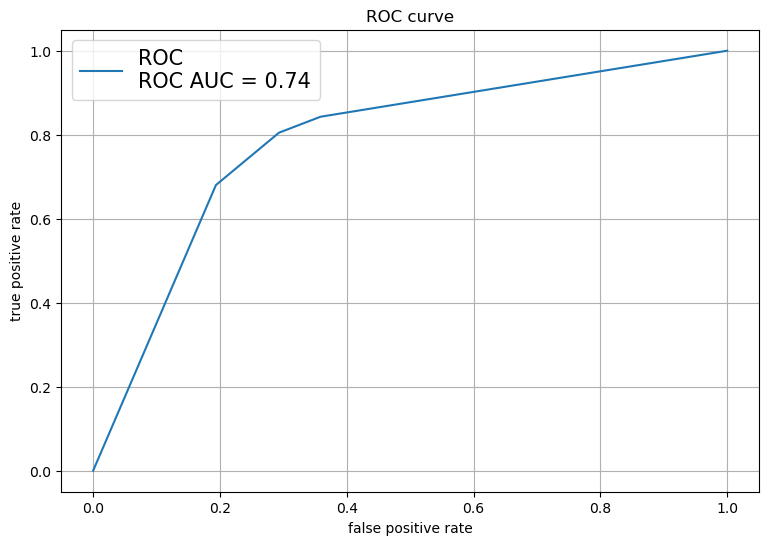

In [19]:
fpr, tpr, thr = metrics.roc_curve(Test_labels, prediction_proba[:,1])
plt.figure(figsize = (9,6))
rou_auc_score = (round(metrics.roc_auc_score(Test_labels, prediction),2))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(rou_auc_score))
plt.grid()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title(u"ROC curve")
plt.legend(fontsize = 15)

In [20]:
DecisionTree_depth_10 = tree.DecisionTreeClassifier(random_state=2, max_depth = 10)
DecisionTree_depth_10.fit(Train_data, Train_labels)
prediction = DecisionTree_depth_10.predict(Test_data)

In [21]:
print('accuracy = ', metrics.accuracy_score(Test_labels, prediction))
print('precision = ', metrics.precision_score(Test_labels, prediction))
print('recall = ', metrics.recall_score(Test_labels, prediction))
print('roc_auc = ', metrics.roc_auc_score(Test_labels, prediction))
print('f1_score = ', metrics.f1_score(Test_labels, prediction))
print('log_loss = ', metrics.log_loss(Test_labels, prediction))

accuracy =  0.7669773635153129
precision =  0.7389162561576355
recall =  0.8130081300813008
roc_auc =  0.7677606095432682
f1_score =  0.7741935483870968
log_loss =  8.048429595788242


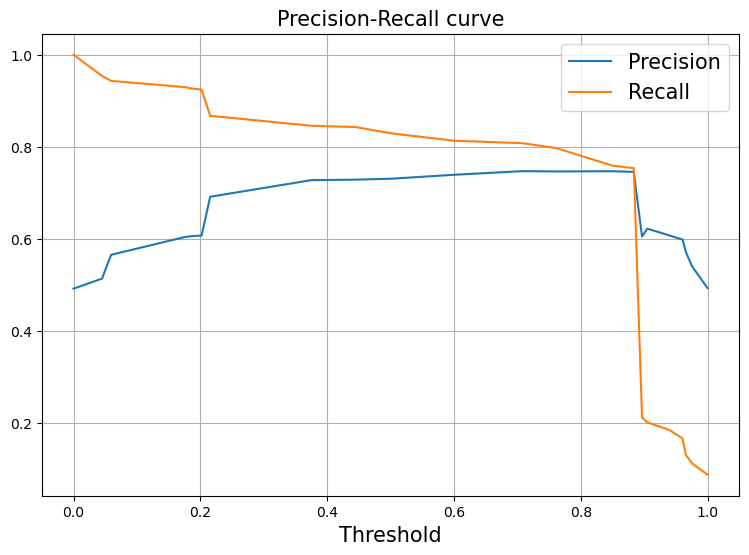

In [22]:
prediction_proba = DecisionTree_depth_10.predict_proba(Test_data)
prec, rec, thresh = metrics.precision_recall_curve(Test_labels, prediction_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

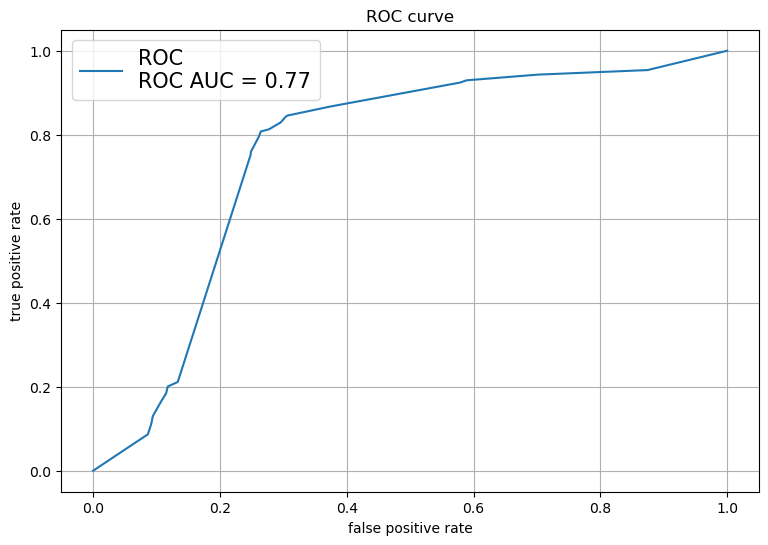

In [28]:
fpr, tpr, thr = metrics.roc_curve(Test_labels, prediction_proba[:,1])
plt.figure(figsize = (9,6))
rou_auc_score = (round(metrics.roc_auc_score(Test_labels, prediction),2))
plt.plot(fpr, tpr, label='ROC \n'+'ROC AUC = ' + str(rou_auc_score))
plt.grid()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC curve")
plt.legend(fontsize = 15)

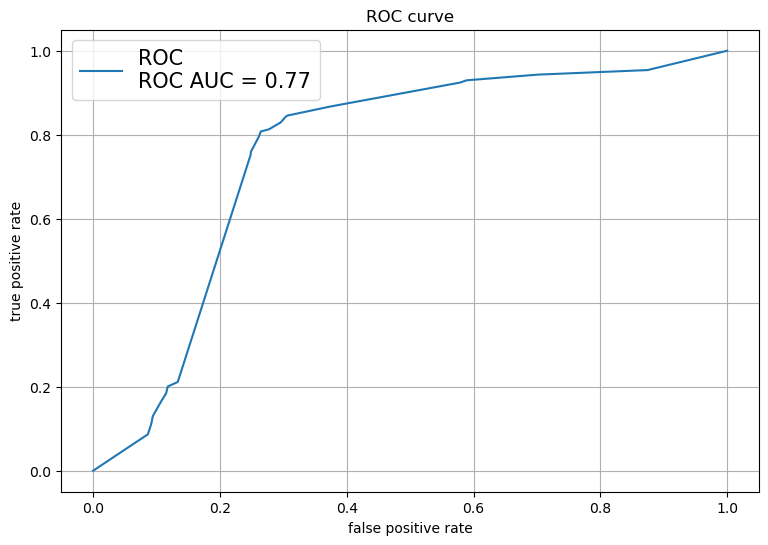

In [27]:
fpr, tpr, thr = metrics.roc_curve(Test_labels, prediction_proba[:,1])
plt.figure(figsize = (9,6))
rou_auc_score = (round(metrics.roc_auc_score(Test_labels, prediction),2))
plt.plot(fpr, tpr, label='ROC \n'+'ROC AUC = ' + str(rou_auc_score))
plt.grid()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC curve")
plt.legend(fontsize = 15)

In [29]:
RandomForest_depth_5 = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
RandomForest_depth_5.fit(Train_data, Train_labels)
prediction = RandomForest_depth_5.predict(Test_data)

In [30]:
print('accuracy = ', metrics.accuracy_score(Test_labels, prediction))
print('precision = ', metrics.precision_score(Test_labels, prediction))
print('recall = ', metrics.recall_score(Test_labels, prediction))
print('roc_auc = ', metrics.roc_auc_score(Test_labels, prediction))
print('f1_score = ', metrics.f1_score(Test_labels, prediction))
print('log_loss = ', metrics.log_loss(Test_labels, prediction))

accuracy =  0.7416777629826897
precision =  0.7058823529411765
recall =  0.8130081300813008
roc_auc =  0.7428914995956243
f1_score =  0.7556675062972292
log_loss =  8.922267070960649


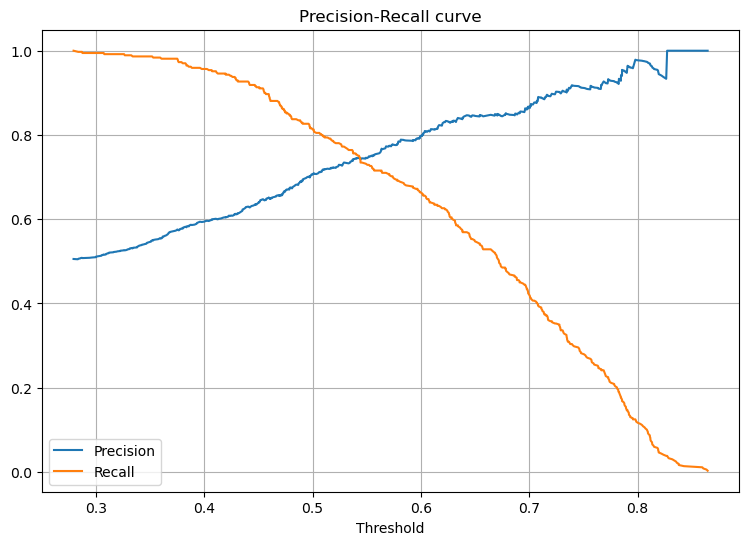

In [31]:
predictions_proba = RandomForest_depth_5.predict_proba(Test_data)
prec, rec, thresh = metrics.precision_recall_curve(Test_labels, predictions_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title('Precision-Recall curve')
plt.legend()

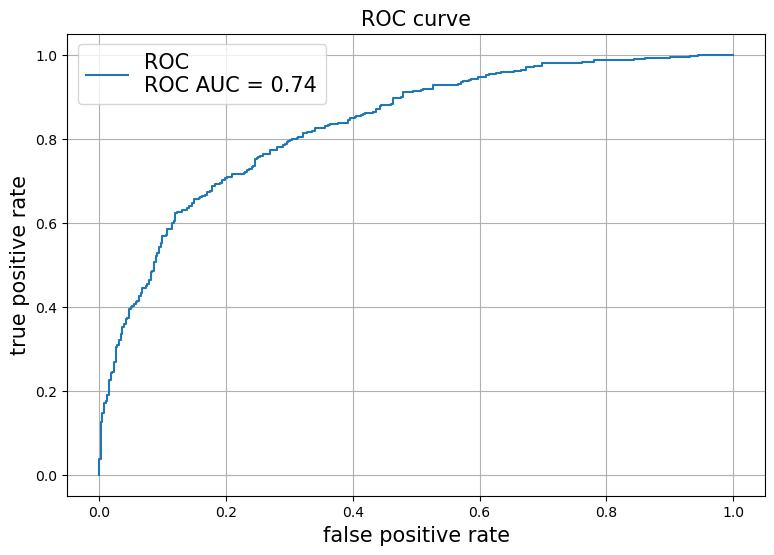

In [34]:
fpr, tpr, thr = metrics.roc_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize = (9,6))
rou_auc_score = (round(metrics.roc_auc_score(Test_labels, prediction),2))
plt.plot(fpr, tpr, label='ROC \n'+'ROC AUC = ' + str(rou_auc_score))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

In [35]:
RandomForest_depth_20 = RandomForestClassifier(n_estimators = 200, max_depth = 20, random_state = 22)
RandomForest_depth_20.fit(Train_data, Train_labels)
prediction = RandomForest_depth_20.predict(Test_data)

In [36]:
print('accuracy = ', metrics.accuracy_score(Test_labels, prediction))
print('precision = ', metrics.precision_score(Test_labels, prediction))
print('recall = ', metrics.recall_score(Test_labels, prediction))
print('roc_auc = ', metrics.roc_auc_score(Test_labels, prediction))
print('f1_score = ', metrics.f1_score(Test_labels, prediction))
print('log_loss = ', metrics.log_loss(Test_labels, prediction))

accuracy =  0.8069241011984021
precision =  0.7842639593908629
recall =  0.8373983739837398
roc_auc =  0.8074426424892521
f1_score =  0.8099606815203145
log_loss =  6.6686957963297155


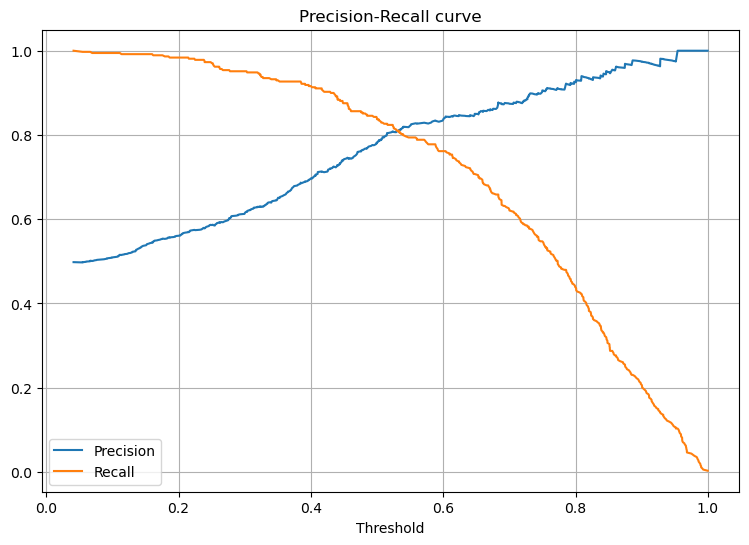

In [37]:
predictions_proba = RandomForest_depth_20.predict_proba(Test_data)
prec, rec, thresh = metrics.precision_recall_curve(Test_labels, predictions_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title('Precision-Recall curve')
plt.legend()

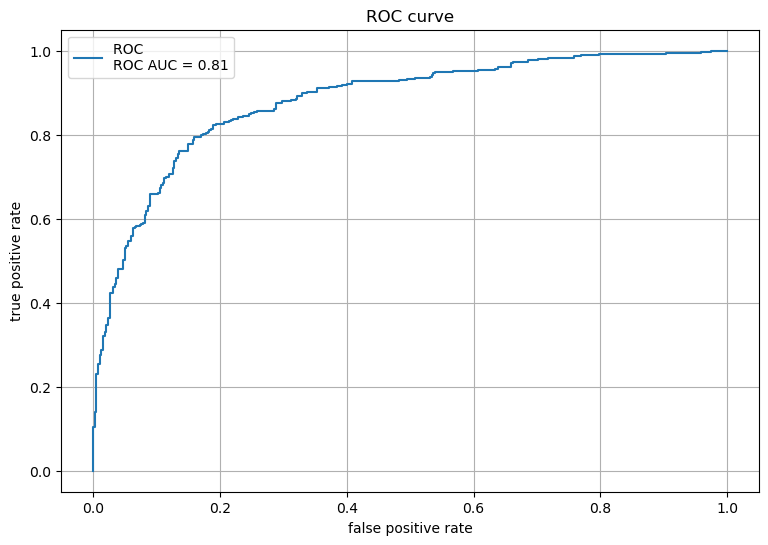

In [39]:
fpr, tpr, thr = metrics.roc_curve(test_labels, predictions_proba[:,1])
plt.figure(figsize = (9,6))
rou_auc_score = (round(metrics.roc_auc_score(Test_labels, prediction),2))
plt.plot(fpr, tpr, label='ROC \n'+'ROC AUC = ' + str(rou_auc_score))
plt.grid()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title(u"ROC curve")
plt.legend()

In [40]:
RandomForest_depth_10 = RandomForestClassifier(n_estimators = 50, max_depth = 10)
RandomForest_depth_10.fit(Train_data, Train_labels)
predictions = RandomForest_depth_10.predict(Test_data)
predictions_proba = RandomForest_depth_10.predict_proba(Test_data)

#threshold = 0.3
prob_array = np.array(predictions_proba[:,1])
for prob in np.nditer(prob_array, op_flags = ['readwrite']):
    if prob >= 0.3:            
        prob[...] = 1
    else:
        prob[...] = 0

print('accuracy = ', metrics.accuracy_score(Test_labels, prob_array))
print('precision = ', metrics.precision_score(Test_labels, prob_array))
print('recall = ', metrics.recall_score(Test_labels, prob_array))
print('roc_auc = ', metrics.roc_auc_score(Test_labels, prob_array))
print('f1_score = ', metrics.f1_score(Test_labels, prob_array))
print('log_loss = ', metrics.log_loss(Test_labels, prob_array))

accuracy =  0.6564580559254327
precision =  0.5917355371900826
recall =  0.9701897018970189
roc_auc =  0.6617964216291377
f1_score =  0.7351129363449692
log_loss =  11.86578137210681
